In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


In [ ]:

def get_data(scale=False):
    X = dataset.iloc[:,1:2].values.astype(float)
    y = dataset.iloc[:,2:3].values.astype(float).reshape(-1, 1).ravel()
    if scale == True:
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        X = sc_X.fit_transform(X)
        y = sc_y.fit_transform(y.reshape(-1, 1)).ravel()
        return { 'X': X, 'sc_X': sc_X, 'y': y, 'sc_y': sc_y, 'regressor': train_data(X, y) }
    else:
        return { 'X': X, 'y': y, 'regressor': train_data(X, y) }

def train_data(X, y):
    regressor = SVR(kernel='rbf')
    regressor.fit(X, y)
    return regressor
    
def visualise(args):
    args['coords_color'] = args.get('coords_color', 'red')
    args['model_color'] = args.get('model_color', 'blue')
    if 'sc_X' in args['data']:
        print('\n Prediction scaled data: ' + 
        str(args['data']['sc_y'].inverse_transform(args['data']['regressor'].predict(args['data']['sc_X'].transform(np.array([[6.5]]))).reshape(-1, 1))[0][0]) + '\n')
        X_grid = np.arange(min(args['data']['X']), max(args['data']['X']), 0.1)
        X_grid = X_grid.reshape((len(X_grid), 1))
        X_plot = X_grid
        pred = args['data']['regressor'].predict(X_grid)
    else:
        print('\n Prediction not scaled data: ' + str(args['data']['regressor'].predict(np.array([[6.5]]))[0]) + '\n')
        X_plot = args['data']['X']
        pred = args['data']['regressor'].predict(args['data']['X'])
    plt.scatter(args['data']['X'], args['data']['y'], color=args['coords_color'])
    plt.plot(X_plot, pred, color=args['model_color'])
    plt.title('Truth or Bluff (Support Vector Regression Model)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    


 Prediction not scaled data: 130001.82883924115



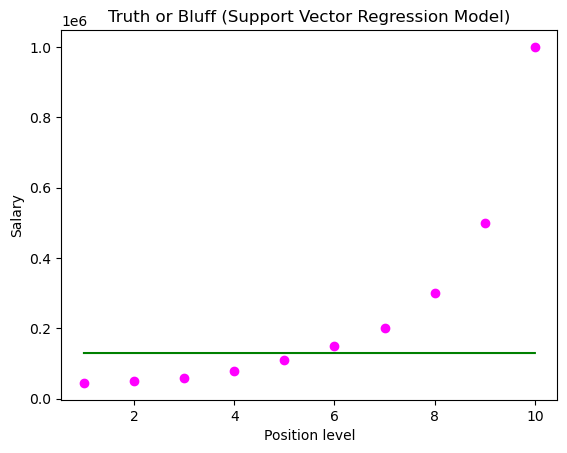


 Prediction scaled data: 170370.02040650236



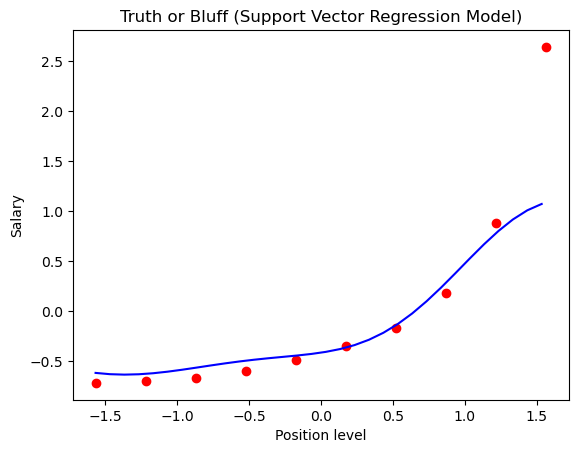

In [186]:

dataset = pd.read_csv('./salaries.csv')

visualise({ 'data': get_data(), 'coords_color': 'magenta', 'model_color': 'green' })
visualise({ 'data': get_data(True) })
    